In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dataset=pd.read_csv("dataset_FLD.csv",header=None)
ind_1=np.where(dataset.iloc[:,-1].values==1)
ind_0=np.where(dataset.iloc[:,-1].values==0)

m1=sum(dataset.iloc[ind_1].values[:,:-1])/len(dataset.iloc[ind_1])
m0=sum(dataset.iloc[ind_0].values[:,:-1])/len(dataset.iloc[ind_0])
m1=m1.reshape(len(m1),1)
m0=m0.reshape(len(m0),1)
print("\nm1 =",m1,"\nm0=",m0,"\n")
#calculating Sw and w
s1=np.zeros((len(m1),len(m1)))
s0=np.zeros((len(m0),len(m0)))
X0=dataset.iloc[ind_0].values[:,:-1]
X1=dataset.iloc[ind_1].values[:,:-1]
#print(X0,"\n",X1)

for i in X0:
    #print(i)
    t0=i.reshape((len(m0),1))
    s0=s0+np.dot(t0-m0,np.transpose(t0-m0))
for i in X1:
    #print(i)
    t1=i.reshape((len(m1),1))
    s1=s1+np.dot(t1-m1,np.transpose(t1-m1))
    
sw=s0/len(X0)+s1/len(X1)
w=np.dot(np.linalg.inv(sw),(m0-m1))

print("Vector w= ",w)
w_unit=w/np.linalg.norm(w)
print("Unit vector w = ",w_unit)






m1 = [[0.22310309]
 [0.00255859]
 [1.01027072]] 
m0= [[ 0.10229483]
 [ 0.10337021]
 [-1.00513   ]] 

Vector w=  [[  0.07422404]
 [  0.20644839]
 [-11.31793517]]
Unit vector w =  [[ 0.00655686]
 [ 0.01823739]
 [-0.99981218]]



Intersection point =  0.3893028020993768


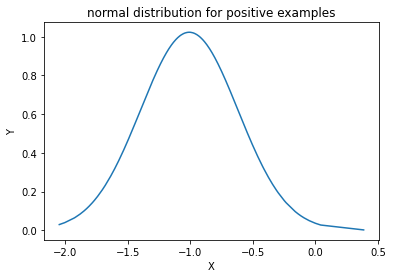

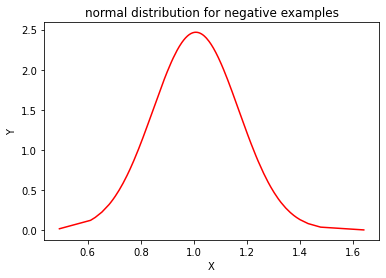

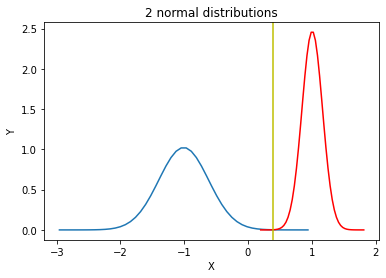

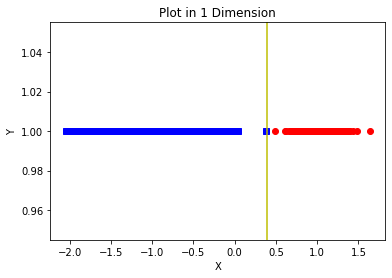


Accuracy =  1.0


In [82]:

i=0
w = w/ np.linalg.norm(w)
proj_pts=np.zeros(len(dataset))
for i in range(len(dataset)):
    #print(i)
    proj_pts[i]=np.dot(np.transpose(w),dataset.iloc[i,:-1].values)
   
    

#plotting normal distribution
m1_proj=proj_pts[ind_1]
m0_proj=proj_pts[ind_0]
std_m1=np.std(m1_proj)
std_m0=np.std(m0_proj)
mean_m1=np.mean(m1_proj)
mean_m0=np.mean(m0_proj)
#print("M1 = ",mean_m1,"\nm0 = ",mean_m0,"\nSw = ",Sw)

m1_proj.sort()
m0_proj.sort()
#print(stats.norm.pdf(m1_proj,mean_m1,std_m1))
#print("My normal library\n")
#normal_points(m1_proj,mean_m1,std_m1)


#intersection pt
a = 1/(2*std_m1**2) - 1/(2*std_m0**2)
b = mean_m0/(std_m0**2) - mean_m1/(std_m1**2)
c = mean_m1**2 /(2*std_m1**2) - mean_m0**2 / (2*std_m0**2) - np.log(std_m0/std_m1)
#quadratic of the form ax^2+bx+c=0
inter_mat=np.roots([a,b,c])
if inter_mat[0]<=max(mean_m0,mean_m1) and min(mean_m0,mean_m1)<=inter_mat[0]:
    inter_pt=inter_mat[0]
else:
    inter_pt=inter_mat[1]
print("\nIntersection point = ",inter_pt) 
plt.plot(m1_proj,normal_points(m1_proj,mean_m1,std_m1))
#plt.plot(m0_proj,normal_points(m0_proj,mean_m0,std_m0),color='r')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("normal distribution for positive examples")
#plt.axvline(x=inter_pt,color='y')
plt.show()

#plt.plot(m1_proj,normal_points(m1_proj,mean_m1,std_m1))
plt.plot(m0_proj,normal_points(m0_proj,mean_m0,std_m0),color='r')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("normal distribution for negative examples")
#plt.axvline(x=inter_pt,color='y')
plt.show()


x_1=np.linspace(mean_m1-5*std_m1,mean_m1+5*std_m1)
x_0=np.linspace(mean_m0-5*std_m0,mean_m0+5*std_m0)
plt.plot(x_1,normal_points(x_1,mean_m1,std_m1))
plt.plot(x_0,normal_points(x_0,mean_m0,std_m0),color='r')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2 normal distributions")
plt.axvline(x=inter_pt,color='y')
plt.show()

#points in 1D
plt.xlabel("X")
plt.plot(m1_proj,len(m1_proj)*[1],'bs')
plt.ylabel("Y")
plt.plot(m0_proj,len(m0_proj)*[1],'ro')
plt.title("Plot in 1 Dimension")
plt.axvline(x=inter_pt,color='y')
plt.show()

c=0
for x in m1_proj:
    if x < inter_pt:
        c+=1
for x in m0_proj:
    if x > inter_pt:
        c+=1
        
print("\nAccuracy = ",c/(np.size(m1_proj)+np.size(m0_proj)))

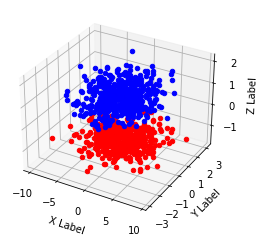

In [57]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for x in X0:
    xs=x[0]
    ys=x[1]
    zs =x[2]
    ax.scatter(xs, ys, zs, c='red')
for x in X1:
    xs=x[0]
    ys=x[1]
    zs =x[2]
    ax.scatter(xs, ys, zs, c='blue')   
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')    
plt.show()    
    

In [52]:
import math
def normal_points(X,mean,std):
    y=np.zeros((np.size(X),1))
    for i in range(len(X)):
        y[i]=1/(std*((2*math.pi)**0.5))*math.exp(-0.5*(((X[i]-mean)/std)**2))
    return y

In [65]:
def find_accuracy(pred_y,actual_y):
    c=0
    for i in range(np.size(y)):
        if(actual[y]==pred[y]):
            c=c+1
    return c/np.size(y)    
    

In [139]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot_plane(a,b,c,d):
    x=np.linspace(-20,20,10)
    y=np.linspace(-20,20,10)
    X,Y = np.meshgrid(x,y)
    Z = (d - a*X - b*Y) / c       
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(-140,120)
    plt.title("Hyper plane in 3-D")
    for x in X0:
        xs=x[0]
        ys=x[1]
        zs =x[2]
        ax.scatter(xs, ys, zs, c='red')
    for x in X1:
        xs=x[0]
        ys=x[1]
        zs =x[2]
        ax.scatter(xs, ys, zs, c='blue')   
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax = fig.gca(projection='3d')
    
    surf = ax.plot_surface(X, Y, Z,alpha=0.25,color='y')   
    
    

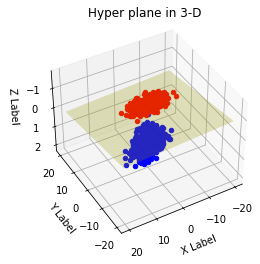

In [140]:
plot_plane(w[0],w[1],w[2],inter_pt)